In [2]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import layers 
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://drive.google.com/file/d/your-link   ---->upload your image to your drive and copy the share link in here
downloaded = drive.CreateFile({'id':"your-link"})
downloaded.GetContentFile('test.jpg')

In [4]:
# https://drive.google.com/file/d/1VbxRn_WAv0m6jyKzoCCsci_aukaVyyXP/view?usp=sharing
downloaded = drive.CreateFile({'id':"1VbxRn_WAv0m6jyKzoCCsci_aukaVyyXP"})
downloaded.GetContentFile('test.jpg')

In [5]:
from keras.preprocessing.image import load_img, img_to_array
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# Load an arbitrary image to see how different arguments of the Keras ImageDataGeenerator affects the image
image = load_img('test.jpg', target_size=(224, 224))
image = img_to_array(image)

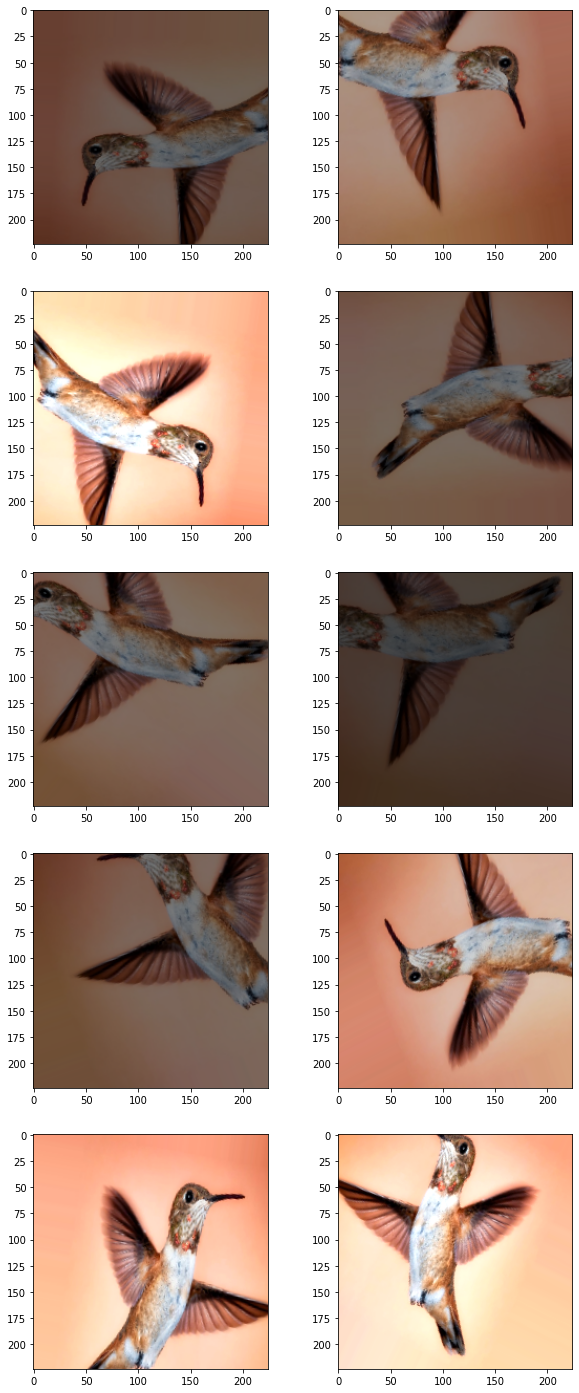

In [7]:
gen = ImageDataGenerator(width_shift_range=[-30, 30], height_shift_range=[-30, 30], horizontal_flip=True, vertical_flip=True, rotation_range=90, brightness_range=[0.15,1.2], zoom_range=[0.8,1.], shear_range=0.01, fill_mode='nearest')
samples_1 = expand_dims(image, 0)
plt.figure(figsize = (10, 25))

for i in range(5):
    for j in range(2):
        plt.subplot2grid((5,2), (i,j))
        it = gen.flow(samples_1, batch_size = 1)
        batch = it.next()
        img = batch[0].astype('uint8')
        plt.imshow(img)    

plt.show()

In [8]:
#loading the data and the model from the previous question
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 3s 0us/step



**What we are going to do is to omit 4500 instances of the data labeled as "cat" and 4500 instances of the data labeled as "dog".Then we will train a model for this dataset. After that, we retrieve the lost data using ImageDataGenerator and train the model again to see how it improves our model.**

In [9]:
#finding the data labeled as "cat" and "dog"
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train_ = []
Y_train_ = []
to_delete_num = 4500
deleted_dog = 0
deleted_cat = 0

for i in range(len(X_train)):
  if labels[Y_train[i][0]]=='dog' and deleted_dog < to_delete_num:
    deleted_dog += 1
  elif labels[Y_train[i][0]]=='cat' and deleted_cat < to_delete_num:
    deleted_cat += 1
  else:
    X_train_.append(X_train[i])
    Y_train_.append(Y_train[i])

X_train_ = np.array(X_train_)
Y_train_ = np.array(Y_train_)


# one-hot encoding the outouts
from keras.utils import np_utils
y_train = np_utils.to_categorical(Y_train_)
y_test = np_utils.to_categorical(Y_test)

# normalizing pixel datas from [0, 255] to [0, 1]
x_train_ = X_train_.astype('float32')
x_test_ = X_test.astype('float32')

x_train = x_train_ / 255
x_test = x_test_ / 255


In [11]:
# creating the model designed last part
np.random.seed(1)
tf.random.set_seed(1)
model = Sequential()
# layer one
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(layers.Dropout(0.2))

# layer two
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(layers.Dropout(0.2))


#layer three
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
# model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10))
model.add(layers.LeakyReLU(0.1))
model.add(layers.Activation('softmax'))
model.summary()
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [12]:
# Training

history = model.fit(x_train, y_train, batch_size=128, epochs=19, validation_data=(x_test, y_test))


Epoch 1/19
321/321 [==============================] - 38s 15ms/step - loss: 1.8262 - accuracy: 0.3154 - val_loss: 1.6622 - val_accuracy: 0.4453
Epoch 2/19
321/321 [==============================] - 4s 14ms/step - loss: 1.1551 - accuracy: 0.5880 - val_loss: 1.3164 - val_accuracy: 0.5586
Epoch 3/19
321/321 [==============================] - 4s 14ms/step - loss: 0.8832 - accuracy: 0.6953 - val_loss: 1.1524 - val_accuracy: 0.6208
Epoch 4/19
321/321 [==============================] - 4s 14ms/step - loss: 0.7335 - accuracy: 0.7453 - val_loss: 1.1777 - val_accuracy: 0.6319
Epoch 5/19
321/321 [==============================] - 4s 14ms/step - loss: 0.6406 - accuracy: 0.7783 - val_loss: 1.0502 - val_accuracy: 0.6642
Epoch 6/19
321/321 [==============================] - 4s 14ms/step - loss: 0.5360 - accuracy: 0.8178 - val_loss: 0.9271 - val_accuracy: 0.6951
Epoch 7/19
321/321 [==============================] - 4s 14ms/step - loss: 0.4839 - accuracy: 0.8370 - val_loss: 0.9190 - val_accuracy: 0.704

 Accuracy on Test set: 0.7293


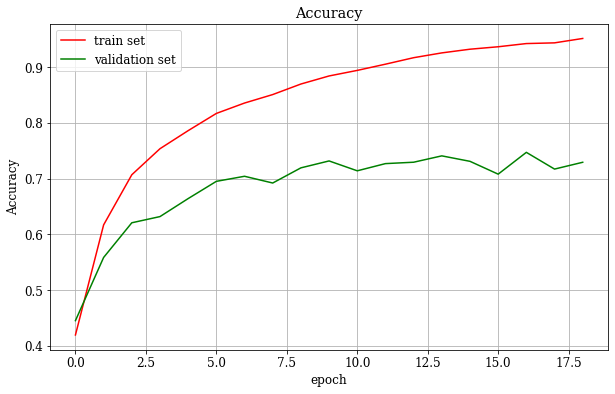

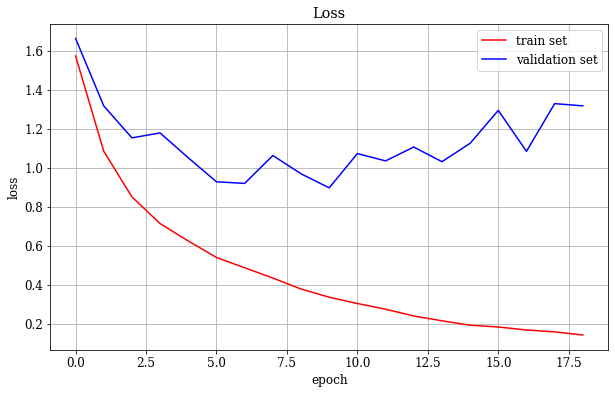

In [13]:
y_pred = model.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
success_num = np.sum(pred_labels == y_true) 
accuracy = float(success_num)/y_pred.shape[0]
print(" Accuracy on Test set: {}".format(accuracy))
# Accuracy Plots
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()


# Loss Plots
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()

[[799   9  52  38  14  10   2   8  37  14]
 [ 12 865   1   6   2   4   4   1  18  39]
 [ 33   4 741 166  70 163  33  32  10   7]
 [  2   0  10 228   4  81   9   9   1   1]
 [ 12   3  70 135 793 114  43  44   3   1]
 [  1   0   9  82   2 316   3   8   1   2]
 [  9   8  57 152  48  85 875   7   3   1]
 [ 15   5  34 116  63 184  12 876   4  12]
 [ 83  28  19  35   4  26  11   4 908  31]
 [ 34  78   7  42   0  17   8  11  15 892]]


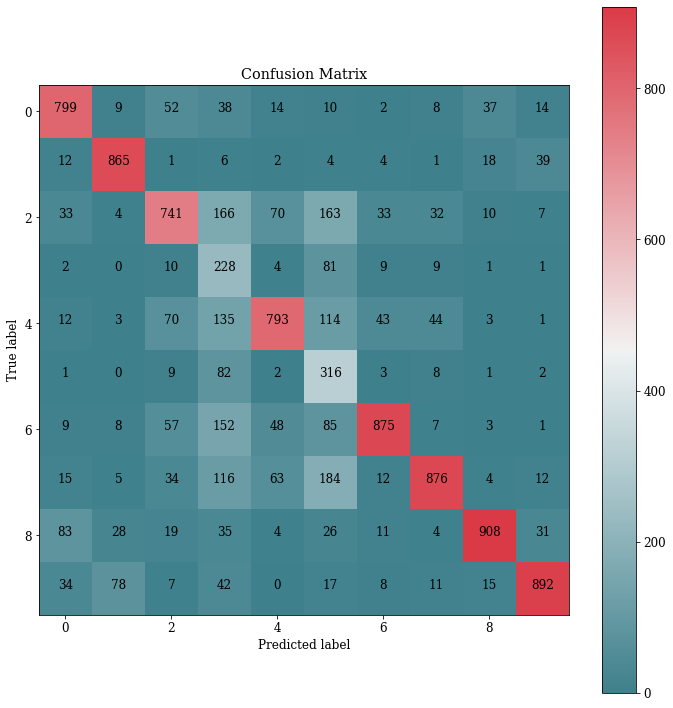

In [14]:
confusion_mtx = confusion_matrix(pred_labels, y_true)
plt.figure(figsize = (10,10))
print(confusion_mtx)
cmap = sns.diverging_palette(210, 10, as_cmap=True)
plt.imshow(confusion_mtx, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()
import itertools
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
      plt.text(j, i, confusion_mtx[i, j],horizontalalignment="center")

In [15]:
# Generating Data using Data Augmentation
gen_tr = ImageDataGenerator( horizontal_flip=True, width_shift_range = 0.01, height_shift_range = 0.01, rotation_range=90)

x_tr_cat = []
x_tr_dog = []
y_tr_cat = []
y_tr_dog = []

#finding thr data labeled as cat or dog
for i in range(x_train.shape[0]):
   if y_train[i][3]==1:
     x_tr_cat.append(x_train[i])
     y_tr_cat.append(y_train[i])
   if y_train[i][5]==1:
     x_tr_dog.append(x_train[i])
     y_tr_dog.append(y_train[i])

x_tr_cat = np.array(x_tr_cat)
y_tr_cat = np.array(y_tr_cat)
x_tr_dog = np.array(x_tr_dog)
y_tr_dog = np.array(y_tr_dog)

gen_tr.fit(x_tr_dog)
gen_tr.fit(x_tr_cat)

xaug_cat = []
yaug_cat = []
xaug_dog = []
yaug_dog = []

for x_batch, y_batch in gen_tr.flow(x_tr_cat, y_tr_cat, batch_size=9):
  for j in range(500):
    for i in range(9):
      xaug_cat.append(x_batch[i])
      yaug_cat.append(y_batch[i])
      #plt.imshow(x_batch)
  break

for x_batch, y_batch in gen_tr.flow(x_tr_dog, y_tr_dog, batch_size=9):
  for j in range(500):
    for i in range(9):
      xaug_dog.append(x_batch[i])
      yaug_dog.append(y_batch[i])
      #plt.imshow(x_batch)
  break


xaug_cat=np.array(xaug_cat)
yaug_cat=np.array(yaug_cat)

xaug_dog=np.array(xaug_dog)
yaug_dog=np.array(yaug_dog)

x_tr = np.concatenate((xaug_cat, xaug_dog))
y_tr = np.concatenate((yaug_cat, yaug_dog))

x_new = np.concatenate((x_tr, x_train))
y_new = np.concatenate((y_tr, y_train))


In [17]:

# creating the model designed last 
np.random.seed(1)
tf.random.set_seed(1)

model2 = Sequential()
# layer one
model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model2.add(layers.Dropout(0.2))

# layer two
model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model2.add(layers.Dropout(0.2))


#layer three
model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 
model2.add(layers.MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model2.add(layers.Dropout(0.3))

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model2.add(layers.Dense(256, activation='relu', input_shape = (256, )))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(10))
model2.add(layers.LeakyReLU(0.1))
model2.add(layers.Activation('softmax'))
model2.summary()
model2.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [18]:
# Training

history2 = model2.fit(x_new, y_new, batch_size=128, epochs=19, validation_data=(x_test, y_test), shuffle = True)


Epoch 1/19
391/391 [==============================] - 7s 16ms/step - loss: 1.7923 - accuracy: 0.3381 - val_loss: 1.6166 - val_accuracy: 0.4781
Epoch 2/19
391/391 [==============================] - 5s 14ms/step - loss: 0.9533 - accuracy: 0.6558 - val_loss: 1.3800 - val_accuracy: 0.5700
Epoch 3/19
391/391 [==============================] - 5s 14ms/step - loss: 0.7468 - accuracy: 0.7383 - val_loss: 1.2733 - val_accuracy: 0.6055
Epoch 4/19
391/391 [==============================] - 5s 14ms/step - loss: 0.6133 - accuracy: 0.7854 - val_loss: 1.1496 - val_accuracy: 0.6298
Epoch 5/19
391/391 [==============================] - 5s 14ms/step - loss: 0.5383 - accuracy: 0.8125 - val_loss: 0.9823 - val_accuracy: 0.6762
Epoch 6/19
391/391 [==============================] - 6s 14ms/step - loss: 0.4729 - accuracy: 0.8370 - val_loss: 1.0219 - val_accuracy: 0.6751
Epoch 7/19
391/391 [==============================] - 6s 14ms/step - loss: 0.4255 - accuracy: 0.8529 - val_loss: 0.9052 - val_accuracy: 0.7019

 Accuracy on Test set: 0.7332


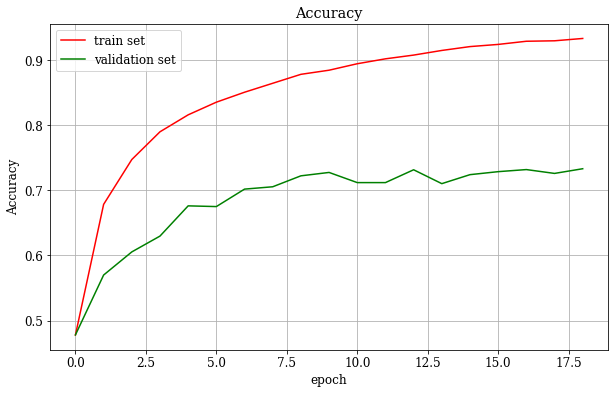

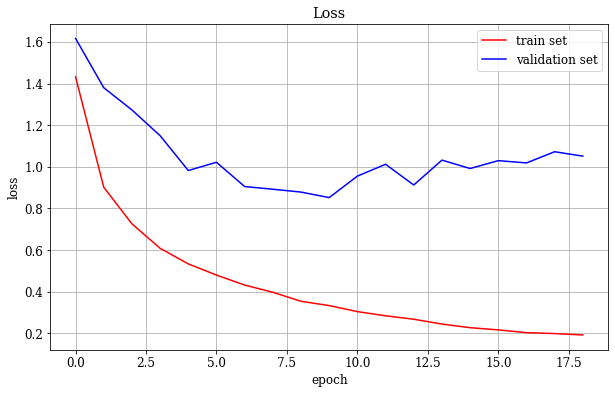

In [19]:
y_pred = model2.predict(x_test)
pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
success_num = np.sum(pred_labels == y_true) 
accuracy = float(success_num)/y_pred.shape[0]
print(" Accuracy on Test set: {}".format(accuracy))
# Accuracy Plots
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(10,6))
plt.plot(history2.history['accuracy'], 'r')
plt.plot(history2.history['val_accuracy'], 'g')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()


# Loss Plots
fig = plt.figure(figsize=(10,6))
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'b')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'])
plt.grid()

[[770   6  47  24   4   9   2   7  29  12]
 [ 10 873   4  12   2   5   1   3  25  21]
 [ 42   5 686 116  35 124  32  25  12   2]
 [  4   1  12 227   9  92   7   3   3   4]
 [ 37   1 109 185 842 133  33  70   8   4]
 [  0   0  13  91   5 358   5   6   3   0]
 [ 10  11  82 165  42  94 904  13   5   3]
 [ 21   1  31 128  55 156   9 862   8  10]
 [ 65  13   8  22   4  14   3   2 875   9]
 [ 41  89   8  30   2  15   4   9  32 935]]


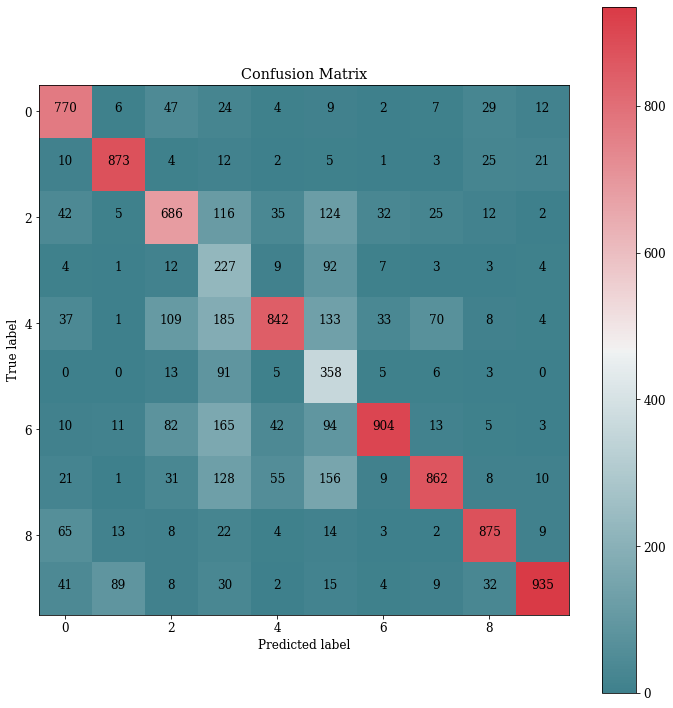

In [20]:
confusion_mtx = confusion_matrix(pred_labels, y_true)
plt.figure(figsize = (10,10))
print(confusion_mtx)
cmap = sns.diverging_palette(210, 10, as_cmap=True)
plt.imshow(confusion_mtx, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()
import itertools
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
      plt.text(j, i, confusion_mtx[i, j],horizontalalignment="center")